In [ ]:
# # 🐼 PANDAS DATA ANALYSIS CHEATSHEET

# import pandas as pd
# import numpy as np

# # 1. 📥 Read / Write Data
# df = pd.read_csv('data.csv')
# df = pd.read_excel('data.xlsx')
# df.to_csv('output.csv', index=False)

# # 2. 🧾 Basic Data Info
# df.head()
# df.tail()
# df.shape
# df.columns
# df.info()
# df.describe()

# # 3. 🧹 Data Cleaning
# df.isnull().sum()
# df.dropna(inplace=True)
# df.fillna(0, inplace=True)
# df.fillna(method='ffill', inplace=True)

# # Change datatypes
# df['col'] = df['col'].astype(int)
# df['date'] = pd.to_datetime(df['date'])

# # Rename columns
# df.rename(columns={'old': 'new'}, inplace=True)
# df.columns = [col.lower().replace(" ", "_") for col in df.columns]

# # 4. 🔍 Selecting & Filtering
# df['column']
# df[['col1', 'col2']]
# df.iloc[0]
# df.loc[0]
# df[df['age'] > 30]
# df[(df['age'] > 30) & (df['gender'] == 'Male')]
#df.loc[["Row1","Row2"]]
#rowindex ,coulmnindex [.iloc]
#df.iloc[2:4,0:2]
# Use loc when you’re working with named labels (especially after setting index like df.set_index()).
# Use iloc when you're working purely by position (index numbers).

# # 5. 🔄 Transformation
# df['new'] = df['a'] + df['b']
# df['log_val'] = np.log(df['value'])
# df['col'].apply(lambda x: x**2)
# df.apply(np.mean, axis=0)

# # Replace / map
# df['gender'] = df['gender'].map({'M': 'Male', 'F': 'Female'})
# df.replace('unknown', np.nan, inplace=True)

# # 6. 📊 Grouping & Aggregation
# df.groupby('category')['value'].sum()
# df.groupby(['cat1', 'cat2'])['value'].agg(['mean', 'max'])

# # 7. 📌 Sorting & Ranking
# df.sort_values(by='age', ascending=False)
# df['rank'] = df['score'].rank()

# # 8. 🔗 Merging & Joining
# pd.concat([df1, df2])
# pd.merge(df1, df2, on='id', how='inner')

# # 9. 🔄 Pivot Tables & Crosstabs
# df.pivot_table(values='sales', index='region', columns='month', aggfunc='sum')
# pd.crosstab(df['gender'], df['purchased'])

# # 10. 🧱 Indexing
# df.set_index('id', inplace=True)
# df.reset_index(inplace=True)

# # 11. 🕒 Date & Time
# df['date'] = pd.to_datetime(df['date'])
# df['year'] = df['date'].dt.year
# df['month'] = df['date'].dt.month
# df['weekday'] = df['date'].dt.day_name()

# # 12. 🔤 String Operations
# df['name'].str.lower()
# df['email'].str.contains('@gmail')
# df['address'].str.extract(r'(\d{5})')

# # 13. 📊 EDA Essentials
# df['col'].value_counts()
# df['num_col'].hist()
# df.boxplot(column='age')
# df.corr()

# # 14. 🧰 Useful Utilities
# df.sample(5)
# df.duplicated().sum()
# df.drop_duplicates(inplace=True)
# df.memory_usage(deep=True)

# # 15. 📦 Integration Examples
# # NumPy
# np.mean(df['value'])
# # Matplotlib
# import matplotlib.pyplot as plt
# df['value'].hist()
# plt.show()

# # Seaborn
# import seaborn as sns
# sns.boxplot(x='category', y='value', data=df)

# # 16. 🧪 Real-World Use Cases
# # - Cleaning messy datasets
# # - Combining and reshaping multiple sources
# # - Preparing features for ML
# # - Building pivot reports for stakeholders


In [ ]:

import numpy as np
import pandas as pd
df=pd.read_excel("ipl_dataset.xlsx")
df.describe()

In [ ]:
df[['winner','season','team1']]

In [ ]:
#  .iloc = Index-based selection
# Think: "I" for index

# You use row and column numbers (like in Excel)df.iloc[0]      # First row
# df.iloc[0, 1]     # First row, second column
# df.iloc[0:3]      # First 3 rows (0, 1, 2)

# .loc = Label-based selection
# Think: "L" for label

# You use row labels (like index names) and column names
# df.loc[0]               # Row with index label 0
# df.loc[0, 'Name']       # Row 0, column 'Name'
# df.loc[0:3, ['Name']]   # Rows 0 to 3, column 'Name'

# df.iloc[0] → Alice (first row by position)

# df.loc[100] → Alice (row with index label 100)



In [ ]:
#value_count,counts the unique values in a column (or Series) and returns a sorted Series (by default in descending order).Used on basically categotrical columns
import matplotlib.pyplot as plt
df["winner"].value_counts()


In [ ]:

df["toss_decision"].value_counts().plot(kind="pie")
df["winner"].value_counts().plot(kind="bar")
df["win_by_runs"].plot(kind="hist") # histogram works on mumerical columns


In [ ]:
#FOR SERIES ,it contains only two things one is index and other is Values
# to access only index of a series we do
series=df["winner"].value_counts()
series.index
#for values
series.values

In [ ]:
#QUESTION FIND OUT TOP FIVE TEAMS WHO HAVE PLAYED MOT MATCHES
df["team1"].value_counts()# match played as team 1 
df["team2"].value_counts()# match played as team 2 
# to find all matches played we just add both of the results
df["team1"].value_counts() +df["team2"].value_counts()  
#if the index of the series are same(in this case) we can perform  agggregation on the series

In [ ]:
# sort_values(),Sorts a DataFrame or Series by values (ascending or descending).
(df["team1"].value_counts() +df["team2"].value_counts()).sort_values(ascending=False)
df.sort_values("city")
df.sort_values("city",ascending=False)
#if want to sort more than one column
df.sort_values(["city","date"])
#if we want city inascensing but date in descending
df.sort_values(["city","date"],ascending=[True,False])



In [ ]:
#DROP DUPLICATES,Oh yes! drop_duplicates() is a lifesaver when you're cleaning messy data in pandas. Let's break it down nice and easy:
#Removes duplicate rows from a DataFrame based on one or more columns.
#Drop Based on Specific Columns:
df.drop_duplicates(subset="city").shape # Keeps the first occurrence of each unique Name.
df.drop_duplicates(subset='Name', keep='last') #Keep Last Occurrence Instead:
#If you want to drop all duplicates completely, keeping only unique values:
df[df.duplicated(subset='Name', keep=False) == False]




In [ ]:

#Think of groupby() like "grouping similar items together so you can perform calculations on each group separately."#GROUPBY,It splits the data into groups based on some column(s), then applies a function (like sum, mean, count) to each group, and combines the result.
df=pd.read_excel("ipl_dataset.xlsx")
winer=df.groupby("winner")
winer.size()

In [ ]:
#TOP 5 BATSMAN in terms of runscore
df=pd.read_csv("deliveries.csv")
man=df.groupby("batsman")
man["batsman_runs"].sum().sort_values(ascending=False).head()

#BATSMAN WHO HIT 4 MAXIMUM NO.OF TIMES
batsman=df[df["batsman_runs"]==4]
batsman.groupby("batsman")["batsman_runs"].count().sort_values(ascending=False).head()

#VIRAT KOHLI SMASHED MAXIMUM RUNS AGAINST WHICH  3 TEAM
vk=df[df["batsman"]=="V Kohli"]
vk.groupby("bowling_team")["batsman_runs"].sum().sort_values(ascending=False)

#find the most destructive death over batsman in the history of IPL on basis of strike rate.the batsman must have played min 200 balls 
# #use of isin() ,it is used when there are a number of conditions for the mask
death=df[df["over"]>15]
death.head(20)
played_balls=death.groupby("batsman")["batsman_runs"].count()
x=played_balls>200
batsman_list=played_balls[x].index.tolist()

final=df[df["batsman"].isin(batsman_list)]
runs=final.groupby("batsman")["batsman_runs"].sum()
balls=final.groupby("batsman")["batsman_runs"].count()
sr=(runs/balls)*100
sr

#EG
#when you want to match exact values from a list
# #isin function
# countries=["India","Dubai"]
#when you want to match a pattern or partial text
# df[df["countries"].isin(countries)]
#df[df['country].str.contains('United')]
 

batsman
A Mishra             89.005236
AB de Villiers      145.129059
AD Mathews          120.868114
AM Rahane           117.486549
AR Patel            122.672065
AT Rayudu           123.014257
BJ Hodge            121.422376
DA Miller           137.709251
DA Warner           138.318401
DJ Bravo            122.286822
DJ Hussey           120.072661
DPMD Jayawardene    118.791064
Harbhajan Singh     135.194585
IK Pathan           116.751269
JA Morkel           136.938202
JH Kallis           105.936272
JP Duminy           121.970624
JP Faulkner         129.802956
KA Pollard          140.621266
KD Karthik          123.008475
KM Jadhav           130.555556
LRPL Taylor         120.070838
MK Pandey           116.938453
MK Tiwary           114.127424
MS Dhoni            132.835821
NV Ojha             114.528024
P Kumar             105.263158
PP Chawla           110.278373
R Vinay Kumar       106.666667
RA Jadeja           118.792867
RG Sharma           128.497251
RV Uthappa          127.635135


In [169]:
#MERGE FUNCTION
#The pd.merge() function in pandas lets you combine two DataFrames “SQL‑style” by matching values in one or more key columns (or indexes). It’s the go‑to when you want precise control over how tables joi
# NEED PURPLE HOLDER OF EVERY DEASON ,means maximum run scoring batsman seasonwise 


In [ ]:
#PIVOT TABLE,#most important as it  helps us to anwer complex questions easily
#A pivot table in pandas lets you reshape and aggregate your data—much like Excel’s PivotTable—by turning unique values from one column into new columns and computing summary statistics over another.
 # pivot table data ko multiple directrion mei ghumakr boht achha view deta hai
#  df.pivot_table( index=..., columns=..., values=..., aggfunc=...)
 #QUESTION  HOW MANY SIXES HIT BY EVERY TEAM IN EVERY OVER
mask=df["batsman_runs"]==6
new_df=df[mask]
new_df.pivot_table(index="over",columns="batting_team",values='batsman_runs',aggfunc="count")

#index rell us what you want to keep as index
#columns tell us what you want as column in this case it is teams
#values gives us what values we need to see
#agg function tells us which funtion to be applied according to the need
#Combine with .reset_index() to flatten the MultiIndex into columns.

batting_team,Chennai Super Kings,Deccan Chargers,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
over,,,,,,,,,,,,,,
1,5.0,3.0,14.0,4.0,10.0,2.0,10.0,9.0,5.0,12.0,1.0,NaN,20.0,3.0
2,17.0,21.0,19.0,6.0,19.0,4.0,13.0,17.0,6.0,7.0,NaN,2.0,28.0,12.0
3,37.0,11.0,30.0,14.0,27.0,3.0,28.0,22.0,6.0,13.0,2.0,1.0,40.0,16.0
4,34.0,17.0,41.0,9.0,36.0,3.0,35.0,28.0,7.0,21.0,5.0,1.0,43.0,8.0
5,41.0,27.0,29.0,11.0,30.0,3.0,25.0,43.0,7.0,23.0,8.0,5.0,40.0,17.0
6,43.0,22.0,27.0,12.0,39.0,3.0,34.0,50.0,3.0,24.0,6.0,5.0,29.0,10.0
7,22.0,11.0,20.0,10.0,19.0,2.0,26.0,18.0,5.0,15.0,1.0,4.0,18.0,13.0
8,25.0,13.0,26.0,6.0,35.0,2.0,25.0,23.0,10.0,24.0,NaN,3.0,34.0,19.0
9,23.0,17.0,32.0,11.0,36.0,1.0,27.0,35.0,9.0,20.0,3.0,1.0,47.0,15.0


In [175]:

#either by supplying a mapping (dict) or a function. It’s the safest way to change names without disturbing the order of your DataFrame.
df.rename(columns={"ball":"Gend"})

,match_id,inning,batting_team,bowling_team,over,Gend,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [ ]:
#The set_index() and reset_index()
#1 just set index for a dataframe   df.set_index('id')
#2  just opposite set index ,removes the index and change it back to column or whatever was the first
# reset_index() can also be used to change series into dataframe, data["winner"].value_count().reset_index()

In [ ]:
#MISSING VALUE HANDLING
#1 Dropping missing data using dropna()
df=pd.read_csv("weather_data _missing.csv")
df.dropna().shape  #use to drop column or rows as chose usding axis ,if these contains missing values to drop then using how="any" or how="all"
#2 Filling missing values using fillna()
df.fillna(0)#  sets all values missing to 0 ,but not appropriate if any column contains the string so make sure to use a clumn on which you are applying 
df["temperature"].fillna("Not specified")
#we also get some methods as method="bfill" or ffill

0             32.0
1    Not specified
2             28.0
3    Not specified
4             32.0
5    Not specified
6    Not specified
7             34.0
8             40.0
Name: temperature, dtype: object

In [2]:
# filter()
# df.filter(items=None, like=None, regex=None, axis=None)
# df.filter(items=['name', 'age'])  # Returns only 'name' and 'age' columns
# df.filter(like='score')  # Returns all columns that contain 'score' in their name
# df.filter(regex='^S.*e$', axis=1)  # Columns starting with S and ending with e
# df.filter(items=[0, 1], axis=0)  # Gets first and second rows by label
# filter() is label-based, not value-based.
import pandas as pd


# ALEX THE ANALYST

In [27]:
df=pd.read_csv("world_population.csv",index_col="Country")
df

,Rank,CCA3,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Country,,,,,,,,,,,,,,,,
Afghanistan,36,AFG,Kabul,Asia,41128771.0,38972230.0,33753499.0,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,1.0257,0.52
Albania,138,ALB,Tirana,Europe,2842321.0,2866849.0,2882481.0,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.8702,0.9957,0.04
Algeria,34,DZA,Algiers,Africa,44903225.0,43451666.0,39543154.0,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.8531,1.0164,0.56
American Samoa,213,ASM,Pago Pago,Oceania,44273.0,46189.0,51368.0,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.4774,0.9831,0.00
Andorra,203,AND,Andorra la Vella,Europe,79824.0,77700.0,71746.0,71519.0,66097.0,53569.0,35611.0,19860.0,468.0,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,226,WLF,Mata-Utu,Oceania,11572.0,11655.0,12182.0,13142.0,14723.0,13454.0,11315.0,9377.0,142.0,81.4930,0.9953,0.00
Western Sahara,172,ESH,El Aaiún,Africa,575986.0,556048.0,491824.0,413296.0,270375.0,178529.0,116775.0,76371.0,266000.0,2.1654,1.0184,0.01
Yemen,46,YEM,Sanaa,Asia,33696614.0,32284046.0,28516545.0,24743946.0,18628700.0,13375121.0,9204938.0,6843607.0,527968.0,63.8232,1.0217,0.42


In [ ]:
#to set a coulmn as index we use df.set_index("Country",inplace =True) it will change in the origial file
df.reset_index(inplace=True)
#df.loc["Albania"] # suding srting or label 
#df.iloc[1] # using integer  


,,level_0,index,Rank,CCA3,Capital,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Continent,Country,,,,,,,,,,,,,,,,,
Asia,Afghanistan,0,0,36,AFG,Kabul,41128771.0,38972230.0,33753499.0,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,1.0257,0.52
Europe,Albania,1,1,138,ALB,Tirana,2842321.0,2866849.0,2882481.0,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.8702,0.9957,0.04
Africa,Algeria,2,2,34,DZA,Algiers,44903225.0,43451666.0,39543154.0,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.8531,1.0164,0.56
Oceania,American Samoa,3,3,213,ASM,Pago Pago,44273.0,46189.0,51368.0,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.4774,0.9831,0.00
Europe,Andorra,4,4,203,AND,Andorra la Vella,79824.0,77700.0,71746.0,71519.0,66097.0,53569.0,35611.0,19860.0,468.0,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Oceania,Wallis and Futuna,229,229,226,WLF,Mata-Utu,11572.0,11655.0,12182.0,13142.0,14723.0,13454.0,11315.0,9377.0,142.0,81.4930,0.9953,0.00
Africa,Western Sahara,230,230,172,ESH,El Aaiún,575986.0,556048.0,491824.0,413296.0,270375.0,178529.0,116775.0,76371.0,266000.0,2.1654,1.0184,0.01
Asia,Yemen,231,231,46,YEM,Sanaa,33696614.0,32284046.0,28516545.0,24743946.0,18628700.0,13375121.0,9204938.0,6843607.0,527968.0,63.8232,1.0217,0.42


In [ ]:
#let's say we want two indexes
#df.set_index(["Continent","Country"],inplace=True)
df.sort_index() # done mostly like  groupby ,sort all indexes based in first index
# by deafult df does not shows all the rows , in case we want to have a look we does is
#pd.set_option('display.max.rows',215) #we specify total number of columns

level_0  index  Rank CCA3      Capital  \
Continent     Country                                                
Africa        Algeria             2      2    34  DZA      Algiers   
              Angola              5      5    42  AGO       Luanda   
              Benin              21     21    77  BEN   Porto-Novo   
              Botswana           26     26   144  BWA     Gaborone   
              Burkina Faso       31     31    58  BFA  Ouagadougou   
...                             ...    ...   ...  ...          ...   
South America Paraguay          161    161   109  PRY     Asunción   
              Peru              162    162    44  PER         Lima   
              Suriname          199    199   170  SUR   Paramaribo   
              Uruguay           223    223   133  URY   Montevideo   
              Venezuela         227    227    51  VEN      Caracas   

                            2022 Population  2020 Population  2015 Population  \
Continent     Country                                                           
Africa        Algeria            44903225.0       43451666.0       39543154.0   
              Angola             35588987.0       33428485.0       28127721.0   
              Benin              13352864.0       12643123.0       10932783.0   
              Botswana            2630296.0        2546402.0        2305171.0   
              Burkina Faso       22673762.0       21522626.0       18718019.0   
...                                     ...              ...              ...   
South America Paraguay            6780744.0        6618695.0        6177950.0   
              Peru               34049588.0       33304756.0       30711863.0   
              Suriname             618040.0         607065.0         575475.0   
              Uruguay             3422794.0        3429086.0        3402818.0   
              Venezuela          28301696.0       28490453.0       30529716.0   

                            2010 Population  2000 Population  1990 Population  \
Continent     Country                                                           
Africa        Algeria            35856344.0       30774621.0       25518074.0   
              Angola             23364185.0       16394062.0       11828638.0   
              Benin               9445710.0        6998023.0        5133419.0   
              Botswana            2091664.0        1726985.0        1341474.0   
              Burkina Faso       16116845.0       11882888.0        9131361.0   
...                                     ...              ...              ...   
South America Paraguay            5768613.0        5123819.0        4059195.0   
              Peru               29229572.0       26654439.0       22109099.0   
              Suriname             546080.0         478998.0         412756.0   
              Uruguay             3352651.0        3292224.0        3117012.0   
              Venezuela          28715022.0              NaN       19750579.0   

                            1980 Population  1970 Population  Area (km²)  \
Continent     Country                                                      
Africa        Algeria            18739378.0       13795915.0   2381741.0   
              Angola              8330047.0        6029700.0   1246700.0   
              Benin               3833939.0        3023443.0    112622.0   
              Botswana             938578.0         592244.0    582000.0   
              Burkina Faso        6932967.0        5611666.0    272967.0   
...                                     ...              ...         ...   
South America Paraguay            3078912.0        2408787.0    406752.0   
              Peru               17492406.0       13562371.0   1285216.0   
              Suriname             375112.0         379918.0    163820.0   
              Uruguay             2953750.0        2790265.0    181034.0   
              Venezuela          15210443.0       11355475.0         NaN   

                    

In [ ]:
df=pd.read_csv("Flavors.csv")
groupby_frame=df.groupby("Base Flavor") 
groupby_frame.mean(numeric_only=True) # need to specify as it works only on integer columns
groupby_frame.sum(numeric_only=True)
df.groupby("Base Flavor").agg({'Flavor Rating':['max','min','sum','count']})  # to apply on mutiole column make add anothe pair
# WE can also group on mre than one column eg df.groupby(["flavor",'liked'])  

Flavor Rating                 
                      max  min   sum count
Base Flavor                               
Chocolate             8.8  8.2  25.2     3
Vanilla              10.0  2.3  34.2     6

In [ ]:
df.groupby(["Base Flavor","Liked"]).agg({'Flavor Rating':['max','min','sum','count']}) 
df.groupby("Base Flavor").describe() # a generalised function

Flavor Rating                                             \
                    count mean       std  min    25%  50%  75%   max   
Base Flavor                                                            
Chocolate             3.0  8.4  0.346410  8.2  8.200  8.2  8.5   8.8   
Vanilla               6.0  5.7  2.710719  2.3  4.025  5.6  6.8  10.0   

            Texture Rating            ...             Total Rating         \
                     count      mean  ...    75%  max        count   mean   
Base Flavor                           ...                                   
Chocolate              3.0  7.233333  ...  7.350  7.6          3.0  15.70   
Vanilla                6.0  5.650000  ...  6.375  8.0          6.0  11.35   

                                                         
                  std   min     25%   50%     75%   max  
Base Flavor                                              
Chocolate    0.781025  15.2  15.250  15.3  15.950  16.6  
Vanilla      4.263684   5.7   9.025  11.1  13.175  18.0  

[2 rows x 24 columns]

In [96]:
df1=pd.read_csv("LOTR.csv")
df1

,FellowshipID,FirstName,Skills
0,1001,Frodo,Hiding
1,1002,Samwise,Gardening
2,1003,Gandalf,Spells
3,1004,Pippin,Fireworks


In [97]:
df2=pd.read_csv("LOTR 2.csv")
df2


,FellowshipID,FirstName,Age
0,1001,Frodo,50
1,1002,Samwise,39
2,1006,Legolas,2931
3,1007,Elrond,6520
4,1008,Barromir,51


In [ ]:
#MERGE FUNCTION
#In pandas, the merge() function is used to combine two DataFrames using common columns (like SQL joins).
# Inner Join (only matching rows) pd.merge(df1, df2, on='id')
#  Left Join pd.merge(df1, df2, on='id', how='left')
#outerjoim df1.merge(df2,how="outer")
#  Merge on different column names pd.merge(df1, df2, left_on='id1', right_on='id2')
#A cross join returns the Cartesian product of two DataFrames. That means:,Every row in the first DataFrame is paired with every row in the second.
df1.merge(df2 ,how="cross" )


,FellowshipID_x,FirstName_x,Skills,FellowshipID_y,FirstName_y,Age
0,1001,Frodo,Hiding,1001,Frodo,50
1,1001,Frodo,Hiding,1002,Samwise,39
2,1001,Frodo,Hiding,1006,Legolas,2931
3,1001,Frodo,Hiding,1007,Elrond,6520
4,1001,Frodo,Hiding,1008,Barromir,51
5,1002,Samwise,Gardening,1001,Frodo,50
6,1002,Samwise,Gardening,1002,Samwise,39
7,1002,Samwise,Gardening,1006,Legolas,2931
8,1002,Samwise,Gardening,1007,Elrond,6520
9,1002,Samwise,Gardening,1008,Barromir,51


In [ ]:
#JOINS
df1.join(df2,on="FellowshipID",how="outer",lsuffix='left',rsuffix="right") # not looking good that is why we prefer o  indexes
df1.set_index("FellowshipID").join(df2.set_index("FellowshipID"),lsuffix='left',rsuffix="right") #This makes FellowshipID the index in both DataFrames so we can join on it.join(): Joins the two DataFrames based on the index (here, FellowshipID),lsuffix='left', rsuffix='right': If both df1 and df2 have a column with the same name (like FirstName), this avoids a collision by renaming them to FirstName_left and FirstName_right.

,FirstNameleft,Skills,FirstNameright,Age
FellowshipID,,,,
1001,Frodo,Hiding,Frodo,50.0
1002,Samwise,Gardening,Samwise,39.0
1003,Gandalf,Spells,NaN,NaN
1004,Pippin,Fireworks,NaN,NaN


In [122]:
#CONCATENATE(basically means puting one on the top of other)
#In pandas, concat() is used to combine multiple DataFrames either vertically (stacked rows) or horizontally (stacked columns).
# Vertical Concatenation (like stacking rows)
pd.concat([df1,df2]) # we can also specify the type of join we want in it eg join="inner" or "outer",and can also specify on which azis I can join
pd.concat([df1,df2],join="inner")
# Horizontal Concatenation (like adding columns)
#just put azis =1

,FellowshipID,FirstName
0,1001,Frodo
1,1002,Samwise
2,1003,Gandalf
3,1004,Pippin
0,1001,Frodo
1,1002,Samwise
2,1006,Legolas
3,1007,Elrond
4,1008,Barromir


*VISUALISATION*


In [3]:

import pandas as pd 
df=pd.read_csv("Ice Cream Ratings.csv")
df.set_index("Date")


,Flavor Rating,Texture Rating,Overall Rating
Date,,,
1/1/2022,0.223090,0.040220,0.600129
1/2/2022,0.635886,0.938476,0.106264
1/3/2022,0.442323,0.044154,0.598112
1/4/2022,0.389128,0.549676,0.489353
1/5/2022,0.386887,0.519439,0.988280
1/6/2022,0.877984,0.193588,0.832827
1/7/2022,0.140995,0.325110,0.105147


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

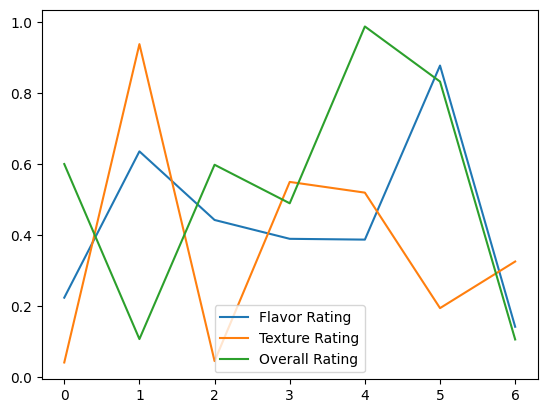

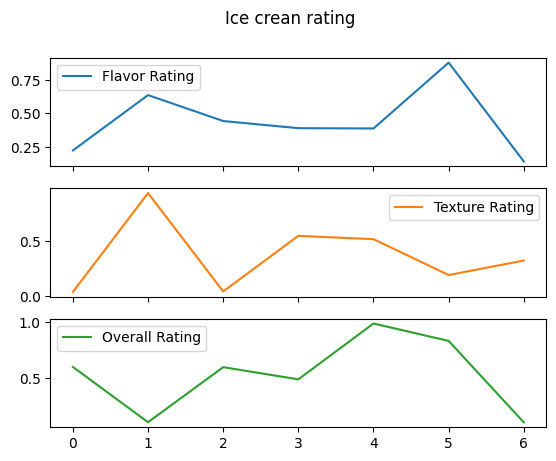

In [ ]:
df.plot(kind="line") # now if you want different plots inllude subplots=true
df.plot(kind="line",subplots=True,title="Ice crean rating") #add title if you wnat ,add xlabel.ylabe if you want

<Axes: >

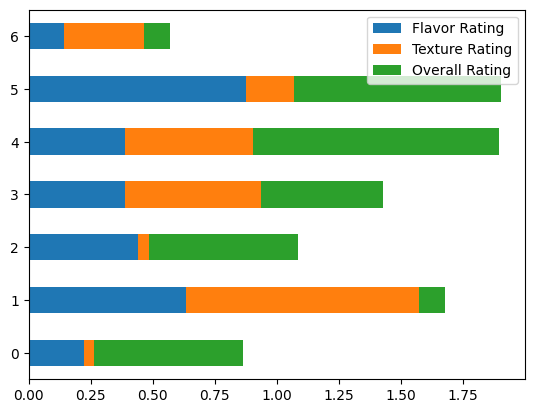

In [145]:
#df.plot(kind="bar") #if we want stacked jsut add stacked-true
#df.plot(kind="bar",stacked=True) # and let's say if we want only one column in the bar chart
#df["Flavor Rating"].plot(kind="bar",stacked=True)
# for horizontal barchart 
df.plot.barh(stacked=True)

<Axes: xlabel='Texture Rating', ylabel='Overall Rating'>

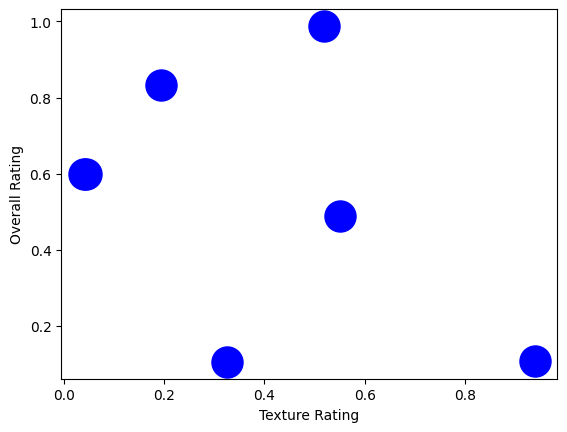

In [151]:
df.plot.scatter(x="Texture Rating",y="Overall Rating",s=500,c="blue") # we have to specify x and y axis, s for size of dots

<Axes: ylabel='Frequency'>

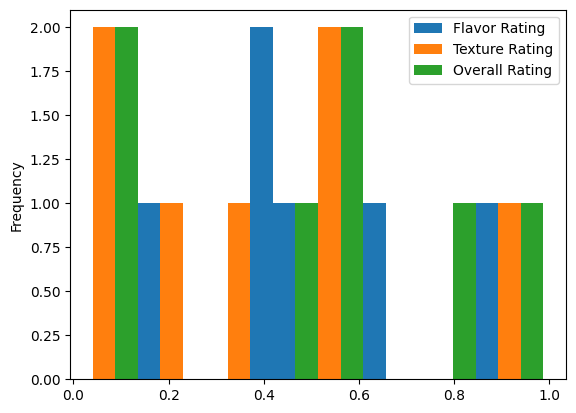

In [ ]:
df.plot.hist(bins=20) # bins meand divide the data in given ranges

<Axes: >

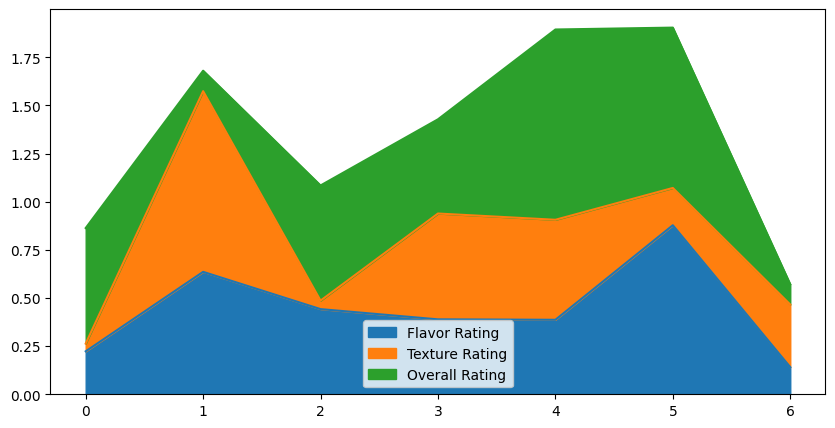

In [5]:
df.plot(kind="area",figsize=(10,5)) #jus for the size fisize-(10,5)

<Axes: ylabel='Flavor Rating'>

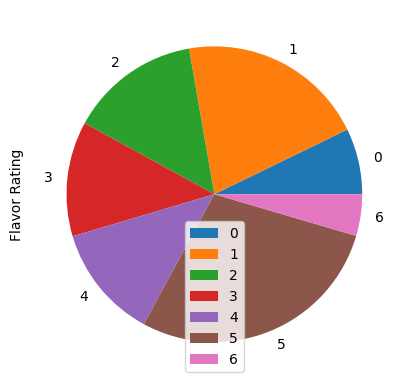

In [7]:
df.plot(kind="pie",y='Flavor Rating')  # we have to mentiione y,To plot a pie chart, you must select only one numeric column and optionally set labels. Here's how to fix it:


*DATA CLEANING*

In [210]:
df=pd.read_excel("Customer Call List.xlsx")
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Not_Useful_Column
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No,True
1,1002,Abed,Nadir,123/643/9775,93 West Main Street,No,Yes,False
2,1003,Walter,/White,7066950392,298 Drugs Driveway,N,NaN,True
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y,True
4,1005,Jon,Snow,876|678|3469,123 Dragons Road,Y,No,True
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes,True
6,1007,Jeff,Winger,NaN,1209 South Street,No,No,False
7,1008,Sherlock,Holmes,876|678|3469,98 Clue Drive,N,No,False
8,1009,Gandalf,NaN,N/a,123 Middle Earth,Yes,NaN,False
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No,True


In [205]:
df=df.drop_duplicates()# to drop duplicates
df.drop(columns=["Not_Useful_Column"]) #to drop not useful columns

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No
1,1002,Abed,Nadir,123/643/9775,93 West Main Street,No,Yes
2,1003,Walter,/White,7066950392,298 Drugs Driveway,N,NaN
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y
4,1005,Jon,Snow,876|678|3469,123 Dragons Road,Y,No
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes
6,1007,Jeff,Winger,NaN,1209 South Street,No,No
7,1008,Sherlock,Holmes,876|678|3469,98 Clue Drive,N,No
8,1009,Gandalf,NaN,N/a,123 Middle Earth,Yes,NaN
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No


In [221]:
# Cleaning the values in Last_Name column 
# If you only want to strip from the start, use .lstrip()
# If only from the end, use .rstrip()
# df["Last_Name"]=df["Last_Name"].str.lstrip("...") 
# df["Last_Name"]=df["Last_Name"].str.lstrip("/")
#we could do all of it at once
# Removes any combination of "1", "2", "3", ".", "_", and "/"
# From both ends of every string in Last_Name
# But not from the middle of the string

df["Last_Name"]=df["Last_Name"].str.strip("123._/")
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Not_Useful_Column,street,State,Zip_code
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,N,True,123 Shire Lane,Shire,
2,1003,Walter,White,,298 Drugs Driveway,N,,True,298 Drugs Driveway,,
4,1005,Jon,Snow,876-678-3469,123 Dragons Road,Y,N,True,123 Dragons Road,,
7,1008,Sherlock,Holmes,876-678-3469,98 Clue Drive,N,N,False,98 Clue Drive,,
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,N,True,25th Main Street,New York,
11,1012,Harry,Potter,,2394 Hogwarts Avenue,Y,,True,2394 Hogwarts Avenue,,
12,1013,Don,Draper,123-543-2345,2039 Main Street,Yes,N,False,2039 Main Street,,
13,1014,Leslie,Knope,876-678-3469,343 City Parkway,Yes,N,False,343 City Parkway,,
14,1015,Toby,Flenderson,304-762-2467,214 HR Avenue,N,N,False,214 HR Avenue,,
15,1016,Ron,Weasley,123-545-5421,2395 Hogwarts Avenue,No,N,False,2395 Hogwarts Avenue,,


In [222]:
df["Phone_Number"]=df["Phone_Number"].str.replace('[^a-zA-Z0-9]','',regex=True)
#Now to fromat the phone number according to our style we use lambda
# df["Phone_Number"]=df["Phone_Number"].apply(lambda x: x[0:3]+'-'+x[3:6]+"-"+x[6:10]) # it will give erroe at first as the phone number is a float value,first we have to convert it to string
df["Phone_Number"]=df["Phone_Number"].apply(lambda x: str(x))
#Now if we copy above statement it will do th job
df["Phone_Number"]=df["Phone_Number"].apply(lambda x: x[0:3]+'-'+x[3:6]+"-"+x[6:10])
df["Phone_Number"]=df["Phone_Number"].str.replace('nan--','')
df["Phone_Number"]=df["Phone_Number"].str.replace('Na--','')
df["Phone_Number"]=df["Phone_Number"].str.replace('--','')
df["Phone_Number"]
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Not_Useful_Column,street,State,Zip_code
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,N,True,123 Shire Lane,Shire,
2,1003,Walter,White,,298 Drugs Driveway,N,,True,298 Drugs Driveway,,
4,1005,Jon,Snow,876-678-3469,123 Dragons Road,Y,N,True,123 Dragons Road,,
7,1008,Sherlock,Holmes,876-678-3469,98 Clue Drive,N,N,False,98 Clue Drive,,
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,N,True,25th Main Street,New York,
11,1012,Harry,Potter,,2394 Hogwarts Avenue,Y,,True,2394 Hogwarts Avenue,,
12,1013,Don,Draper,123-543-2345,2039 Main Street,Yes,N,False,2039 Main Street,,
13,1014,Leslie,Knope,876-678-3469,343 City Parkway,Yes,N,False,343 City Parkway,,
14,1015,Toby,Flenderson,304-762-2467,214 HR Avenue,N,N,False,214 HR Avenue,,
15,1016,Ron,Weasley,123-545-5421,2395 Hogwarts Avenue,No,N,False,2395 Hogwarts Avenue,,


In [223]:
df[["street","State","Zip_code"]]=df["Address"].str.split(',',n=2,expand=True) 
# ',' → the separator
# n=2 → max 2 splits (resulting in up to 3 parts)
# expand=True → return a DataFrame with separate columns
df

ValueError: Columns must be same length as key

In [224]:
df["Do_Not_Contact"]=df["Do_Not_Contact"].str.replace("Yes","Y")
df["Do_Not_Contact"]=df["Do_Not_Contact"].str.replace("No","N")
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Not_Useful_Column,street,State,Zip_code
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,N,True,123 Shire Lane,Shire,
2,1003,Walter,White,,298 Drugs Driveway,N,,True,298 Drugs Driveway,,
4,1005,Jon,Snow,876-678-3469,123 Dragons Road,Y,N,True,123 Dragons Road,,
7,1008,Sherlock,Holmes,876-678-3469,98 Clue Drive,N,N,False,98 Clue Drive,,
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,N,True,25th Main Street,New York,
11,1012,Harry,Potter,,2394 Hogwarts Avenue,Y,,True,2394 Hogwarts Avenue,,
12,1013,Don,Draper,123-543-2345,2039 Main Street,Yes,N,False,2039 Main Street,,
13,1014,Leslie,Knope,876-678-3469,343 City Parkway,Yes,N,False,343 City Parkway,,
14,1015,Toby,Flenderson,304-762-2467,214 HR Avenue,N,N,False,214 HR Avenue,,
15,1016,Ron,Weasley,123-545-5421,2395 Hogwarts Avenue,No,N,False,2395 Hogwarts Avenue,,


In [225]:
df=df.replace("N/a",'')
df=df.replace("NaN",'') # this is not working because the NAN are values do we use
df=df.fillna("")
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Not_Useful_Column,street,State,Zip_code
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,N,True,123 Shire Lane,Shire,
2,1003,Walter,White,,298 Drugs Driveway,N,,True,298 Drugs Driveway,,
4,1005,Jon,Snow,876-678-3469,123 Dragons Road,Y,N,True,123 Dragons Road,,
7,1008,Sherlock,Holmes,876-678-3469,98 Clue Drive,N,N,False,98 Clue Drive,,
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,N,True,25th Main Street,New York,
11,1012,Harry,Potter,,2394 Hogwarts Avenue,Y,,True,2394 Hogwarts Avenue,,
12,1013,Don,Draper,123-543-2345,2039 Main Street,Yes,N,False,2039 Main Street,,
13,1014,Leslie,Knope,876-678-3469,343 City Parkway,Yes,N,False,343 City Parkway,,
14,1015,Toby,Flenderson,304-762-2467,214 HR Avenue,N,N,False,214 HR Avenue,,
15,1016,Ron,Weasley,123-545-5421,2395 Hogwarts Avenue,No,N,False,2395 Hogwarts Avenue,,


In [226]:
#GIVE LIST WHOM WE CAN CALL
for x in df.index:
  if df.loc[x,"Do_Not_Contact"]=='Y':
       df.drop(x,inplace=True)
           
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Not_Useful_Column,street,State,Zip_code
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,N,True,123 Shire Lane,Shire,
2,1003,Walter,White,,298 Drugs Driveway,N,,True,298 Drugs Driveway,,
4,1005,Jon,Snow,876-678-3469,123 Dragons Road,Y,N,True,123 Dragons Road,,
7,1008,Sherlock,Holmes,876-678-3469,98 Clue Drive,N,N,False,98 Clue Drive,,
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,N,True,25th Main Street,New York,
11,1012,Harry,Potter,,2394 Hogwarts Avenue,Y,,True,2394 Hogwarts Avenue,,
12,1013,Don,Draper,123-543-2345,2039 Main Street,Yes,N,False,2039 Main Street,,
13,1014,Leslie,Knope,876-678-3469,343 City Parkway,Yes,N,False,343 City Parkway,,
14,1015,Toby,Flenderson,304-762-2467,214 HR Avenue,N,N,False,214 HR Avenue,,
15,1016,Ron,Weasley,123-545-5421,2395 Hogwarts Avenue,No,N,False,2395 Hogwarts Avenue,,


In [ ]:
for x in df.index:
  if df.loc[x,"Phone_Number"]=='':
       df.drop(x,inplace=True)
       #Another way to drop null values
#df = df.dropna(subset="Phone_Number"), inplace=True)

df["Do_Not_Contact"].str.replace('','N')
 
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Not_Useful_Column,street,State,Zip_code
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,N,True,123 Shire Lane,Shire,
4,1005,Jon,Snow,876-678-3469,123 Dragons Road,Y,N,True,123 Dragons Road,,
7,1008,Sherlock,Holmes,876-678-3469,98 Clue Drive,N,N,False,98 Clue Drive,,
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,N,True,25th Main Street,New York,
12,1013,Don,Draper,123-543-2345,2039 Main Street,Yes,N,False,2039 Main Street,,
13,1014,Leslie,Knope,876-678-3469,343 City Parkway,Yes,N,False,343 City Parkway,,
14,1015,Toby,Flenderson,304-762-2467,214 HR Avenue,N,N,False,214 HR Avenue,,
15,1016,Ron,Weasley,123-545-5421,2395 Hogwarts Avenue,No,N,False,2395 Hogwarts Avenue,,
16,1017,Michael,Scott,123-643-9775,"121 Paper Avenue, Pennsylvania",Yes,N,False,121 Paper Avenue,Pennsylvania,
19,1020,Anakin,Skywalker,876-678-3469,"910 Tatooine Road, Tatooine",Yes,N,True,910 Tatooine Road,Tatooine,


In [229]:
df.reset_index(drop=True)

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Not_Useful_Column,street,State,Zip_code
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,N,True,123 Shire Lane,Shire,
1,1005,Jon,Snow,876-678-3469,123 Dragons Road,Y,N,True,123 Dragons Road,,
2,1008,Sherlock,Holmes,876-678-3469,98 Clue Drive,N,N,False,98 Clue Drive,,
3,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,N,True,25th Main Street,New York,
4,1013,Don,Draper,123-543-2345,2039 Main Street,Yes,N,False,2039 Main Street,,
5,1014,Leslie,Knope,876-678-3469,343 City Parkway,Yes,N,False,343 City Parkway,,
6,1015,Toby,Flenderson,304-762-2467,214 HR Avenue,N,N,False,214 HR Avenue,,
7,1016,Ron,Weasley,123-545-5421,2395 Hogwarts Avenue,No,N,False,2395 Hogwarts Avenue,,
8,1017,Michael,Scott,123-643-9775,"121 Paper Avenue, Pennsylvania",Yes,N,False,121 Paper Avenue,Pennsylvania,
9,1020,Anakin,Skywalker,876-678-3469,"910 Tatooine Road, Tatooine",Yes,N,True,910 Tatooine Road,Tatooine,


## EDA

In [3]:
import pandas as pd
df=pd.read_csv("world_population.csv")
df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.0,38972230.0,33753499.0,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321.0,2866849.0,2882481.0,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225.0,43451666.0,39543154.0,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.0,46189.0,51368.0,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824.0,77700.0,71746.0,71519.0,66097.0,53569.0,35611.0,19860.0,468.0,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572.0,11655.0,12182.0,13142.0,14723.0,13454.0,11315.0,9377.0,142.0,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986.0,556048.0,491824.0,413296.0,270375.0,178529.0,116775.0,76371.0,266000.0,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614.0,32284046.0,28516545.0,24743946.0,18628700.0,13375121.0,9204938.0,6843607.0,527968.0,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675.0,18927715.0,NaN,13792086.0,9891136.0,7686401.0,5720438.0,4281671.0,752612.0,26.5976,1.0280,0.25


In [ ]:
#just to change the floating points 
#This sets the global display format for floating-point numbers in pandas DataFrames (when printed) to 2 decimal places.
pd.set_option('display.float_format',lambda x:'%.2f' %x)

In [7]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              230 non-null    float64
 6   2020 Population              233 non-null    float64
 7   2015 Population              230 non-null    float64
 8   2010 Population              227 non-null    float64
 9   2000 Population              227 non-null    float64
 10  1990 Population              229 non-null    float64
 11  1980 Population              229 non-null    float64
 12  1970 Population              230 non-null    float64
 13  Area (km²)          

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.00,230.00,233.00,230.00,227.00,227.00,229.00,229.00,230.00,232.00,230.00,232.00,234.00
mean,117.50,34632250.88,33600710.95,32066004.16,30270164.48,26840495.26,53016282212560.00,16282884.78,15866499.13,581663.75,456.81,1.01,0.43
std,67.69,137889172.44,135873196.61,131507146.34,126074183.54,113352454.57,802281636846105.75,69345465.54,68355859.75,1769133.06,2083.74,0.01,1.71
min,1.00,510.00,520.00,564.00,596.00,651.00,700.00,733.00,752.00,1.00,0.03,0.91,0.00
25%,59.25,419738.50,406471.00,394295.00,382726.50,329470.00,261928.00,223752.00,145880.50,2567.25,36.60,1.00,0.01
50%,117.50,5762857.00,5456681.00,5244415.00,4889741.00,4491202.00,3785847.00,3135123.00,2511718.00,77141.00,95.35,1.01,0.07
75%,175.75,22653719.00,21522626.00,19730853.75,16825852.50,15625467.00,11910540.00,9817257.00,8817329.00,414643.25,236.88,1.02,0.28
max,234.00,1425887337.00,1424929781.00,1393715448.00,1348191368.00,1264099069.00,12140724210449836.00,982372466.00,822534450.00,17098242.00,23172.27,1.07,17.88


In [ ]:
df.isnull().sum() # gives sum of  total nullvalues present in the data

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                4
2020 Population                1
2015 Population                4
2010 Population                7
2000 Population                7
1990 Population                5
1980 Population                5
1970 Population                4
Area (km²)                     2
Density (per km²)              4
Growth Rate                    2
World Population Percentage    0
dtype: int64

In [7]:
df.nunique() # tells how many unique values does the column contains

Rank                           234
CCA3                           234
Country                        234
Capital                        234
Continent                        6
2022 Population                230
2020 Population                233
2015 Population                230
2010 Population                227
2000 Population                227
1990 Population                229
1980 Population                229
1970 Population                230
Area (km²)                     231
Density (per km²)              230
Growth Rate                    178
World Population Percentage     70
dtype: int64

In [13]:
df.sort_values(by="2022 Population",ascending=False).head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,982372466.0,822534450.0,9706961.0,146.8933,1.0000,17.88
92,2,IND,India,New Delhi,Asia,1.417173e+09,1.396387e+09,1.322867e+09,1.240614e+09,1.059634e+09,NaN,NaN,557501301.0,3287590.0,431.0675,1.0068,17.77
221,3,USA,United States,"Washington, D.C.",North America,3.382899e+08,3.359420e+08,3.246078e+08,3.111828e+08,2.823986e+08,2.480837e+08,223140018.0,200328340.0,9372610.0,36.0935,1.0038,4.24
93,4,IDN,Indonesia,Jakarta,Asia,2.755013e+08,2.718580e+08,2.590920e+08,2.440162e+08,2.140724e+08,1.821599e+08,148177096.0,115228394.0,1904569.0,144.6529,1.0064,3.45
156,5,PAK,Pakistan,Islamabad,Asia,2.358249e+08,2.271967e+08,2.109693e+08,1.944545e+08,1.543699e+08,1.154141e+08,80624057.0,59290872.0,881912.0,267.4018,1.0191,2.96


In [15]:
df.corr(numeric_only=True) 
# we have to specifically mention as  corr is valid on only the numeric columns
# It computes the pairwise correlation between all numeric columns in the DataFrame df using Pearson correlation by default.

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Rank,1.000000,-0.357989,-0.356283,-0.352850,-0.350009,-0.342095,-0.049577,-0.328620,-0.335737,-0.384854,0.128994,-0.220197,-0.358464
2022 Population,-0.357989,1.000000,0.999946,0.999492,0.998633,0.994602,-0.007087,0.986675,0.973135,0.452812,-0.028761,-0.022059,0.999999
2020 Population,-0.356283,0.999946,1.000000,0.999764,0.999108,0.995582,-0.006804,0.988392,0.975245,0.454902,-0.027802,-0.025976,0.999944
2015 Population,-0.352850,0.999492,0.999764,1.000000,0.999784,0.997343,-0.007049,0.991346,0.979413,0.458101,-0.027740,-0.031150,0.999489
2010 Population,-0.350009,0.998633,0.999108,0.999784,1.000000,0.998595,-0.006953,0.993628,0.983050,0.461498,-0.026635,-0.038262,0.998630
2000 Population,-0.342095,0.994602,0.995582,0.997343,0.998595,1.000000,-0.007254,0.997247,0.990959,0.473137,-0.026341,-0.052041,0.994598
1990 Population,-0.049577,-0.007087,-0.006804,-0.007049,-0.006953,-0.007254,1.000000,-0.007798,-0.008425,-0.011320,-0.012659,0.009475,-0.006551
1980 Population,-0.328620,0.986675,0.988392,0.991346,0.993628,0.997247,-0.007798,1.000000,0.999251,0.530726,-0.032167,-0.077794,0.986652
1970 Population,-0.335737,0.973135,0.975245,0.979413,0.983050,0.990959,-0.008425,0.999251,1.000000,0.509942,-0.027523,-0.080020,0.973143
Area (km²),-0.384854,0.452812,0.454902,0.458101,0.461498,0.473137,-0.011320,0.530726,0.509942,1.000000,-0.063545,-0.012829,0.453305


In [30]:
df.groupby("Continent").mean(numeric_only=True)
df[df["Continent"]=='Oceania']

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.0,46189.0,51368.0,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.4774,0.9831,0.00
11,55,AUS,Australia,Canberra,Oceania,26177413.0,25670051.0,23820236.0,22019168.0,19017963.0,17048003.0,14706322.0,12595034.0,7692024.0,3.4032,1.0099,0.33
44,223,COK,Cook Islands,Avarua,Oceania,17011.0,17029.0,17695.0,17212.0,15897.0,17123.0,17651.0,20470.0,236.0,72.0805,1.0005,0.00
66,162,FJI,Fiji,Suva,Oceania,929766.0,920422.0,917200.0,905169.0,832509.0,780430.0,644582.0,527634.0,18272.0,50.8847,1.0056,0.01
70,183,PYF,French Polynesia,Papeete,Oceania,306279.0,301920.0,291787.0,283788.0,250927.0,211089.0,163591.0,117891.0,4167.0,73.5011,1.0074,0.00
81,191,GUM,Guam,Hagåtña,Oceania,171774.0,169231.0,167978.0,164905.0,160188.0,138263.0,110286.0,88300.0,549.0,312.8852,1.0073,0.00
107,192,KIR,Kiribati,Tarawa,Oceania,131232.0,126463.0,116707.0,107995.0,88826.0,75124.0,60813.0,57437.0,811.0,161.8150,1.0183,0.00
126,215,MHL,Marshall Islands,Majuro,Oceania,41569.0,43413.0,49410.0,53416.0,54224.0,46047.0,31988.0,23969.0,181.0,229.6630,0.9886,0.00
132,194,FSM,Micronesia,Palikir,Oceania,114164.0,112106.0,109462.0,107588.0,111709.0,98603.0,76299.0,58989.0,702.0,162.6268,1.0091,0.00
142,225,NRU,Nauru,Yaren,Oceania,12668.0,12315.0,11185.0,10241.0,10377.0,9598.0,7635.0,6663.0,21.0,603.2381,1.0125,0.00


In [32]:
df.groupby("Continent").mean(numeric_only=True).sort_values(by="2022 Population",ascending=False)

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Continent,,,,,,,,,,,,,
Asia,77.560000,9.632739e+07,9.495513e+07,8.916500e+07,8.908777e+07,8.058084e+07,4.864000e+07,4.027833e+07,4.383988e+07,6.427628e+05,1025.024136,1.009384,1.183800
South America,97.571429,3.120119e+07,3.082357e+07,2.950960e+07,2.678940e+07,2.501589e+07,8.671946e+14,1.727064e+07,1.378194e+07,1.301303e+06,20.971979,1.007957,0.391429
Africa,92.157895,2.545588e+07,2.387144e+07,2.141970e+07,1.889820e+07,1.459837e+07,1.137696e+07,8.586032e+06,6.567175e+06,5.378793e+05,126.406569,1.021180,0.313509
Europe,124.500000,1.505537e+07,1.491584e+07,1.502745e+07,1.471228e+07,1.481769e+07,1.478520e+07,1.420000e+07,1.311848e+07,4.602082e+05,663.324742,1.002256,0.186600
North America,160.925000,1.500740e+07,1.485591e+07,1.425960e+07,1.356802e+07,1.215174e+07,1.053166e+07,9.207334e+06,7.885865e+06,6.061044e+05,272.494118,1.004285,0.187750
Oceania,188.521739,2.046386e+06,1.910149e+06,1.756664e+06,1.613164e+06,1.357512e+06,1.162775e+06,9.965322e+05,8.469683e+05,3.702209e+05,132.543065,1.007383,0.023913


<Axes: xlabel='Continent'>

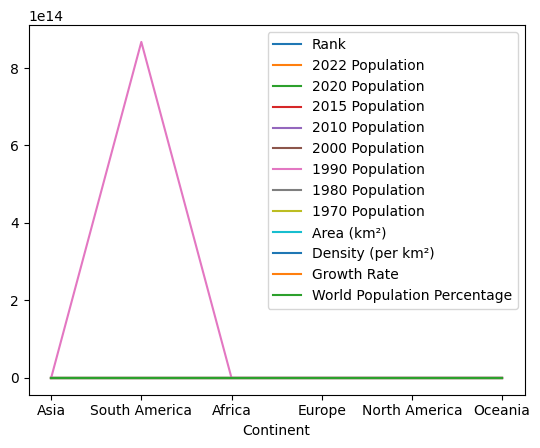

In [39]:
df2=df.groupby("Continent").mean(numeric_only=True).sort_values(by="2022 Population",ascending=False)
df2.plot(kind='line')